
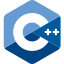
<br>

<div style="text-align:center; font-size:200%;">
  <b>SRP and High Cohesion</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Academy Munich</div>
<br/>
<!-- 11 SRP and High Cohesion.ipynb -->
<!-- slides/module_500_solid_grasp/topic_260_srp_and_high_cohesion_intro.cpp -->


- Problem: Too much functionality in one class
- Both SOLID and GRASP have a pattern for/against this


## Single Responsibility Principle (SRP, SOLID)

- A module should have one, and only one, reason to change
- Alternative formulation: A module should be responsible to one, and only one, actor


- The name can be easily misunderstood:
  - Responsibility-Driven Design (RDD) is an established approach in software
    development
  - Responsibility in RDD is different from responsibility in SRP
  - SRP does not mean that each class may only have a single responsibility (in
    the RDD sense)


## How to determine the "reasons to change"?

Different reasons to change come from:

- different user roles as client (very frequently)
- different modules as client (frequently)
- dependencies on multiple other modules (very frequently)
- different bundled functionalities (very frequently)

In [ ]:
#include <algorithm>
#include <iostream>
#include <vector>

In [ ]:
int compute_save_and_print_results(int a, int b, std::vector<int>& results)
{
    // complex computation...
    auto new_result{a + b};
    // save result to persistent storage...
    results.push_back(new_result);
    // print report...
    std::for_each(results.cbegin(), results.cend(),
                  [](int r){ std::cout << "Result: " << r << "\n";});
    // provide information about the new result...
    return new_result;
}


### What are the reasons to change for this function?

- The complex computation
- The saving of the results
- The printing of the report
- The information about the new result
- The parts or order of the computation

In [ ]:
int compute_result(int a, int b)
{
    return a + b;
}

In [ ]:
void save_result(int result, std::vector<int>& results)
{
    results.push_back(result);
}

In [ ]:
void print_report(const std::vector<int>& results)
{
    std::for_each(results.cbegin(), results.cend(),
                  [](int r){ std::cout << "Result: " << r << "\n";});
}

In [ ]:
int process_new_sensor_data(int a, int b, std::vector<int>& results)
{
    auto new_result{compute_result(a, b)};
    save_result(new_result, results);
    print_report(results);
    return new_result;
}


- We have doubled the amount of code
- Did we really achieve an improvement?


### What are the reasons to change for the new function?

- <del>The complex computation</del> $\rightarrow$ `compute_result()`
- <del>The saving of the results</del> $\rightarrow$ `save_result()`
- <del>The printing of the report</del> $\rightarrow$ `print_report()`
- The information about the new result
- The parts or order of the computation


- The new function still has more than one responsibility
- This is because it violates the Command-Query-Separation-Principle (CQS)
  - It has side effects (saving and printing)
  - It returns a value (the new result)


- A function should either be a query or a command, but not both
- A query is a function that returns a value but has no observable side
  effects
- A command is a function that does not return a value but has observable
  side effects
- A function that does not fulfill CQS always violates SRP


# GRASP: High Cohesion

- Measures how well different parts of an artifact fit together
- High cohesion simplifies evolution, reuse, testing, performance
- Low cohesion makes it difficult to understand the code or to figure out
  where to make changes
- The **negative effect** of low cohesion is always **large**
- It is **difficult** to move a system with low cohesion to a state where it
  has more cohesion
- Code smells: shotgun surgery, divergent change
- Related: Hexagonal Architecture, Layers, SRP, Command/Query Separation,
  Aspects (separation of concerns)


## High Cohesion and Tests

- Low cohesion causes the system functionality to be “smeared” over the whole system
- This often leads to high coupling and large classes
- These classes are difficult to move into a desired state
- “Smeared functionality”
  - Makes unit testing difficult
  - Forces the use of many test doubles
  - Reduces the value of unit tests as documentation